# Regression Analysis
Dr. Chun-Hsiang Chan @ Undergraduate Program in Intelligent Computing and Big Data, Chung Yuan Christian University, Taoyuan, Taiwan.<br/>
Dr. Chun-Hsiang Chan @ Master Program in Intelligent Computing and Big Data, Chung Yuan Christian University, Taoyuan, Taiwan.<br/>

In [1]:
# import packages
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
os.chdir('/Users/toodou/Documents/python/Personal_Project/regress/data/')
df = pd.read_csv('Stores.csv')
df.head()

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620

# Correlation Analysis

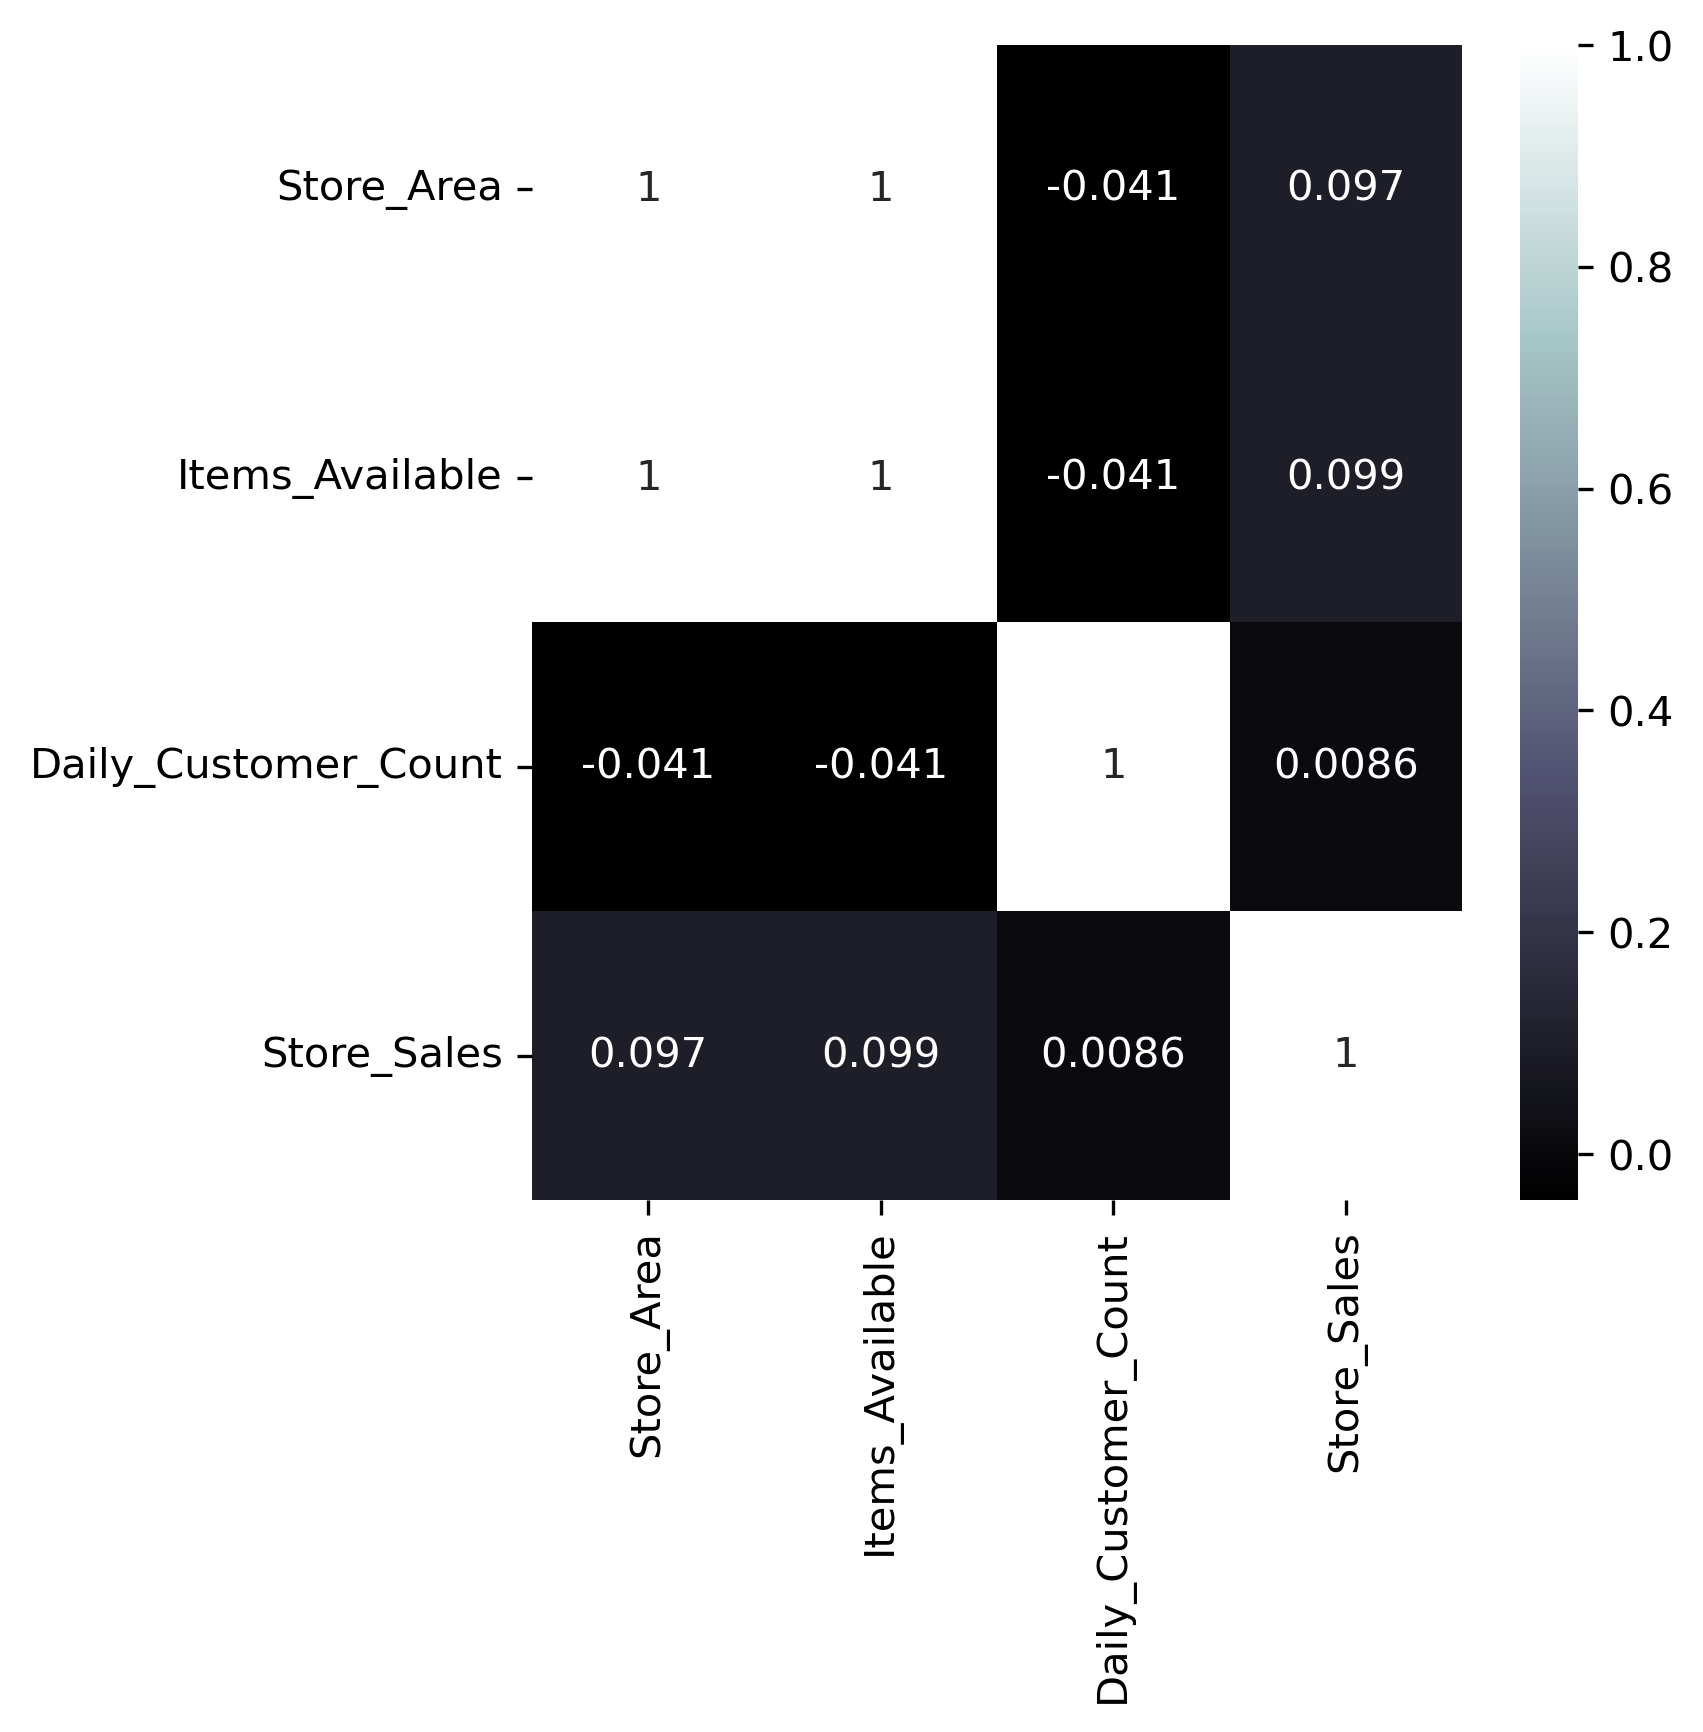

In [3]:
# correlation analysis
plt.figure(figsize=[5,5], dpi=300)
sns.heatmap(df.iloc[:,1:].corr(), annot=True, cmap="bone")
plt.show()

# Simple Linear Regression by scikit-learn

In [4]:
# prepare data for regression analysis
x = np.array(df['Store_Area']).reshape((-1, 1))
y = np.array(df['Store_Sales'])
# set linear regression model
model = LinearRegression()
# model fitting
model.fit(x, y)
# one-step model fitting
model = LinearRegression().fit(x, y)

In [5]:
# r^2 value
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.00950114078866826


In [6]:
# intercept and coefficient
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

intercept: 49404.647965759956
coefficients: [6.6962391]


In [7]:
# prediction
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[60513.70864018 59187.85329748 58377.60836583 59120.89090644
 61256.99118078 59060.6247545  59730.24866495 57848.60547658
 56703.5485897  56301.77424343 57353.08378284 61129.7626378
 61096.28144227 60219.07411958 59241.42321032 60413.26505361
 59971.31327271 60808.34316078 59033.83979808 62395.35182855
 58920.0037333  59167.76458017 60915.48298645 59107.49842823
 57667.80702075 61002.53409481 59281.60064495 58712.42032106
 60399.8725754  60888.69803003 59040.53603718 57774.94684643
 58317.34221389 61350.73852825 58611.97673449 61933.31133034
 59060.6247545  57266.03267448 61719.031679   57908.87162852
 59013.75108077 55866.51870163 60553.88607481 61323.95357183
 56161.15322223 57620.93334702 61250.29494168 60520.40487929
 59261.51192763 58832.95262494 59542.75397002 59884.26216435
 56596.40876403 61886.43765661 59917.74335988 58893.21877688
 61015.92657302 59248.11944942 61196.72502884 61163.24383332
 60815.03939988 62870.78480498 59261.51192763 58176.7211927
 59743

In [8]:
# prediction
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response:\n{y_pred}")

predicted response:
[60513.70864018 59187.85329748 58377.60836583 59120.89090644
 61256.99118078 59060.6247545  59730.24866495 57848.60547658
 56703.5485897  56301.77424343 57353.08378284 61129.7626378
 61096.28144227 60219.07411958 59241.42321032 60413.26505361
 59971.31327271 60808.34316078 59033.83979808 62395.35182855
 58920.0037333  59167.76458017 60915.48298645 59107.49842823
 57667.80702075 61002.53409481 59281.60064495 58712.42032106
 60399.8725754  60888.69803003 59040.53603718 57774.94684643
 58317.34221389 61350.73852825 58611.97673449 61933.31133034
 59060.6247545  57266.03267448 61719.031679   57908.87162852
 59013.75108077 55866.51870163 60553.88607481 61323.95357183
 56161.15322223 57620.93334702 61250.29494168 60520.40487929
 59261.51192763 58832.95262494 59542.75397002 59884.26216435
 56596.40876403 61886.43765661 59917.74335988 58893.21877688
 61015.92657302 59248.11944942 61196.72502884 61163.24383332
 60815.03939988 62870.78480498 59261.51192763 58176.7211927
 59743

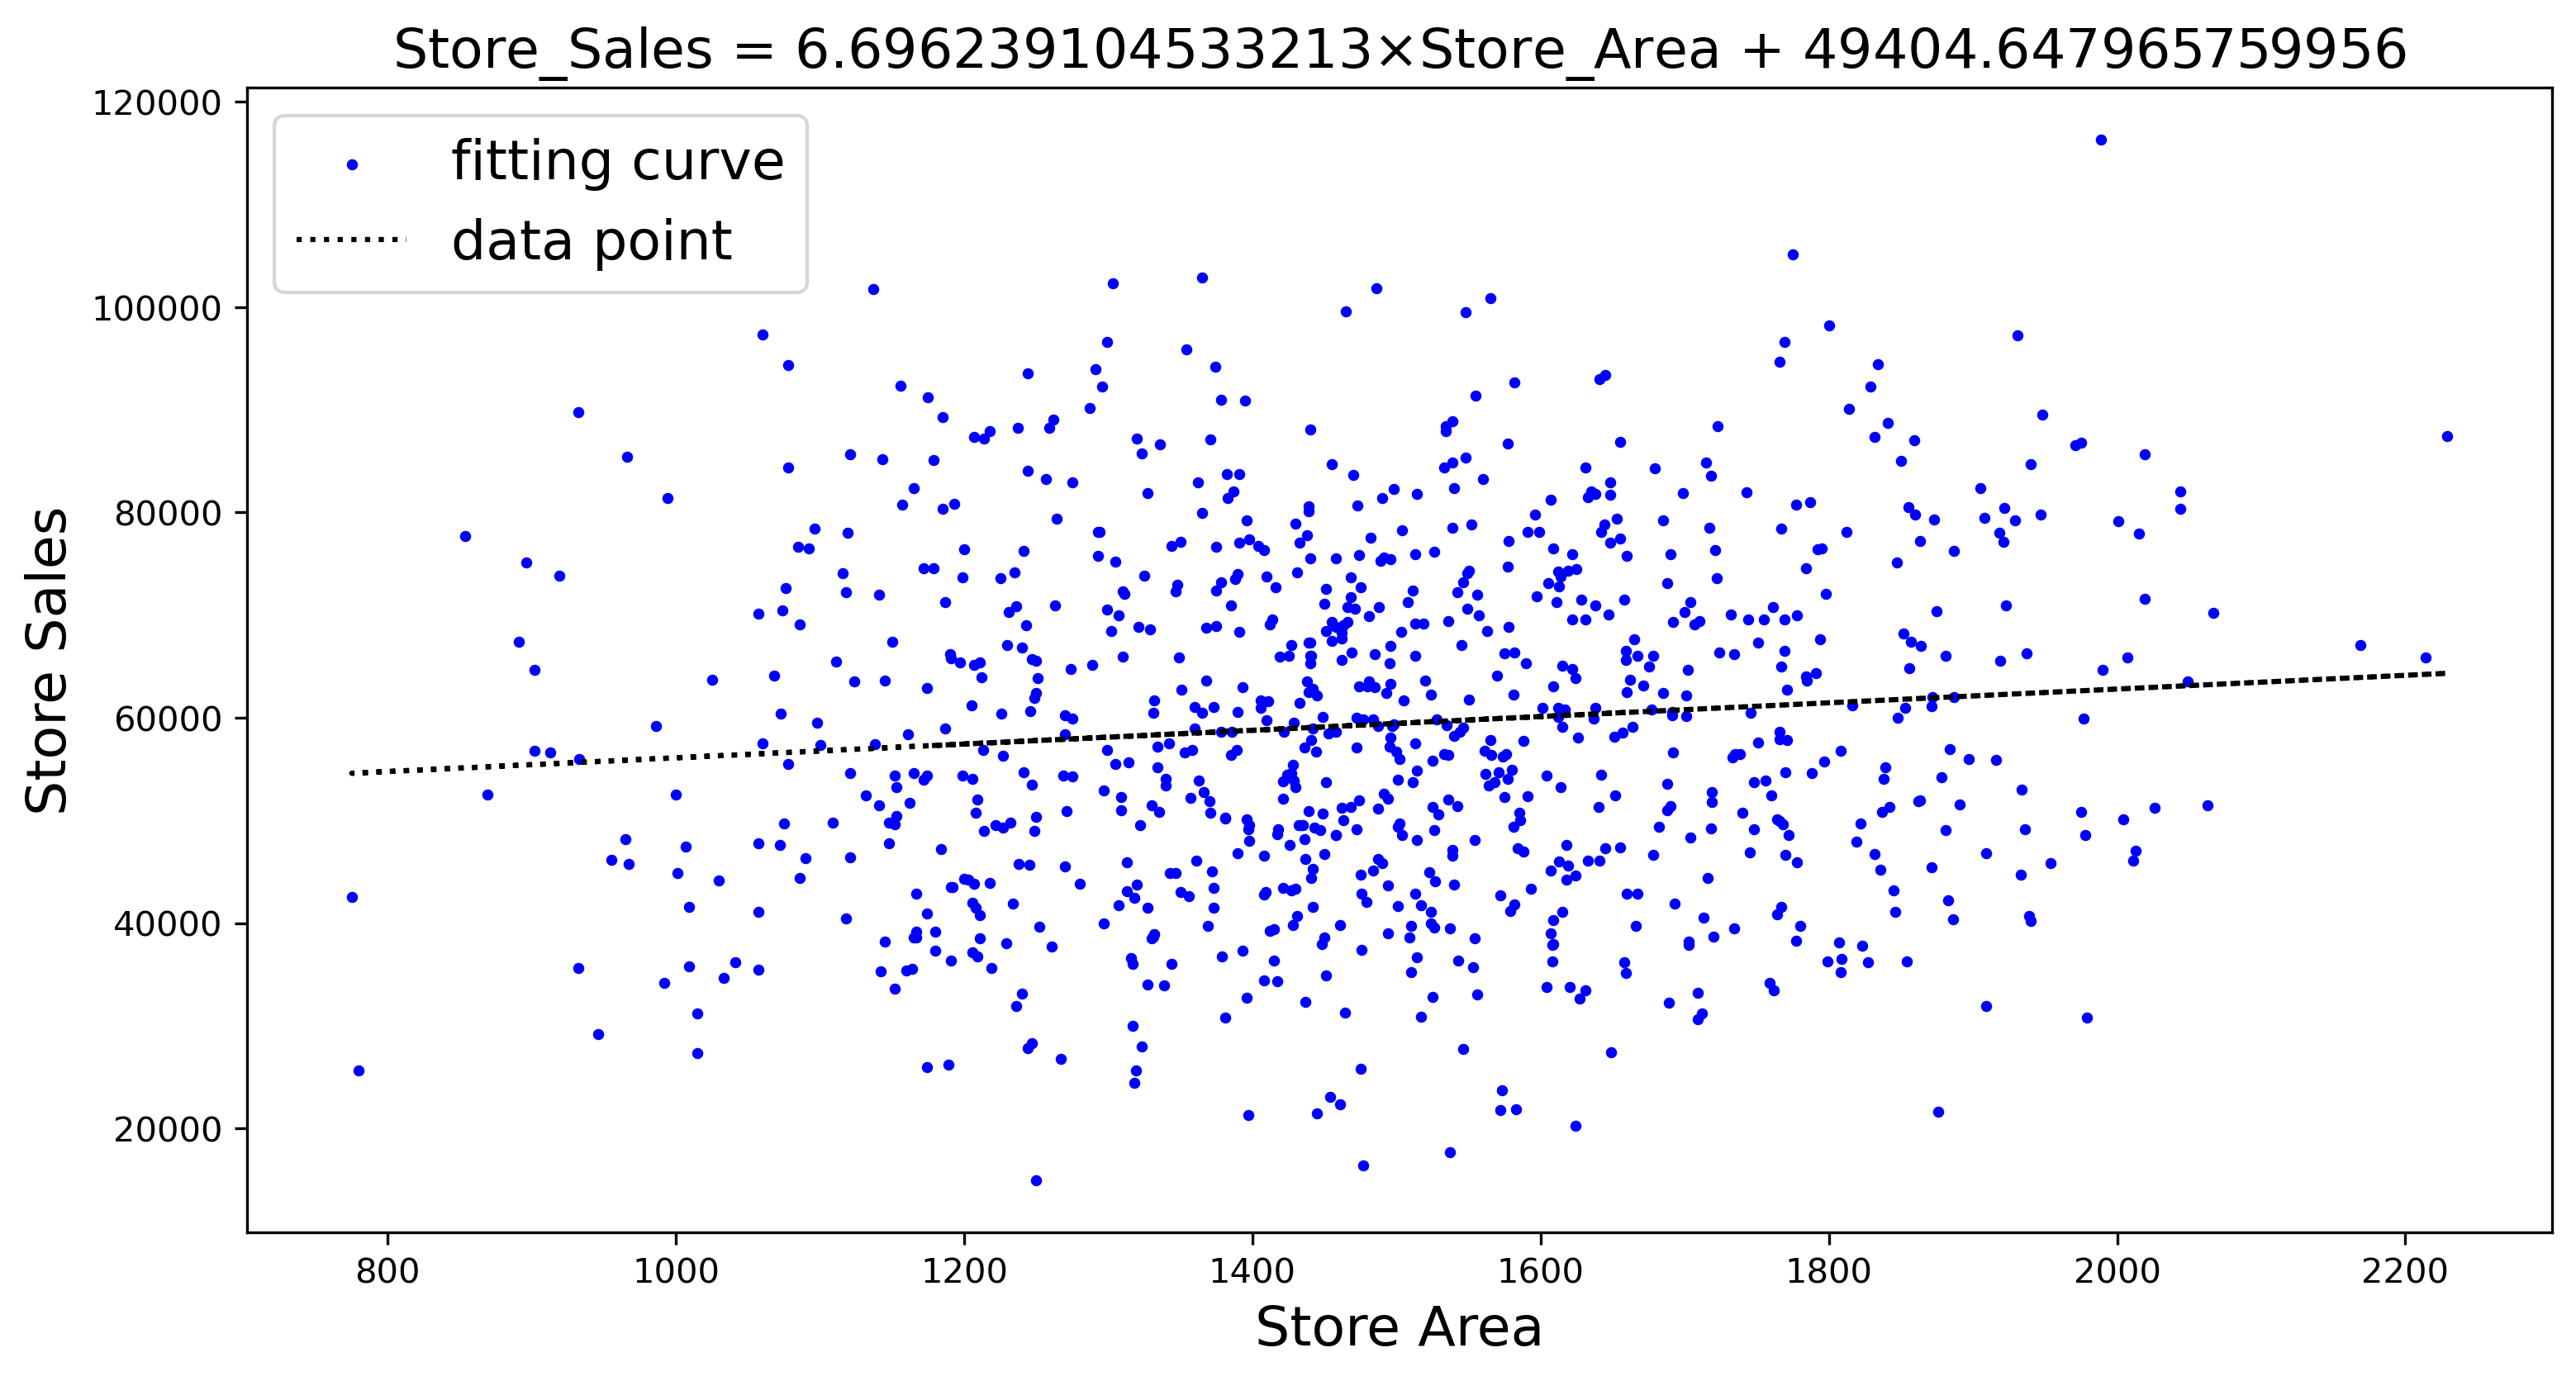

In [9]:
# plot fitting results
plt.figure(figsize=[12,6], dpi=300)
plt.scatter(x, y, c='b', s=5)
plt.plot(x, y_pred, 'k:')
plt.title('Store_Sales = '+str(model.coef_[0])+r'$\times$Store_Area + '+str(model.intercept_), fontsize=16)
plt.legend(['fitting curve','data point'], fontsize=16)
plt.xlabel('Store Area', fontsize=16)
plt.ylabel('Store Sales', fontsize=16)
plt.show()

In [10]:
# prepare data for regression analysis
x = np.array(df['Store_Area']).reshape((-1, 1))
y = np.array(df['Items_Available'])
# one-step model fitting
model = LinearRegression().fit(x, y)
# get r squared, intercept, coefficients
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
# intercept and coefficient
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
# prediction
y_pred = model.predict(x)

coefficient of determination: 0.9977827319395582
intercept: 3.9664856973236056
coefficients: [1.19702285]


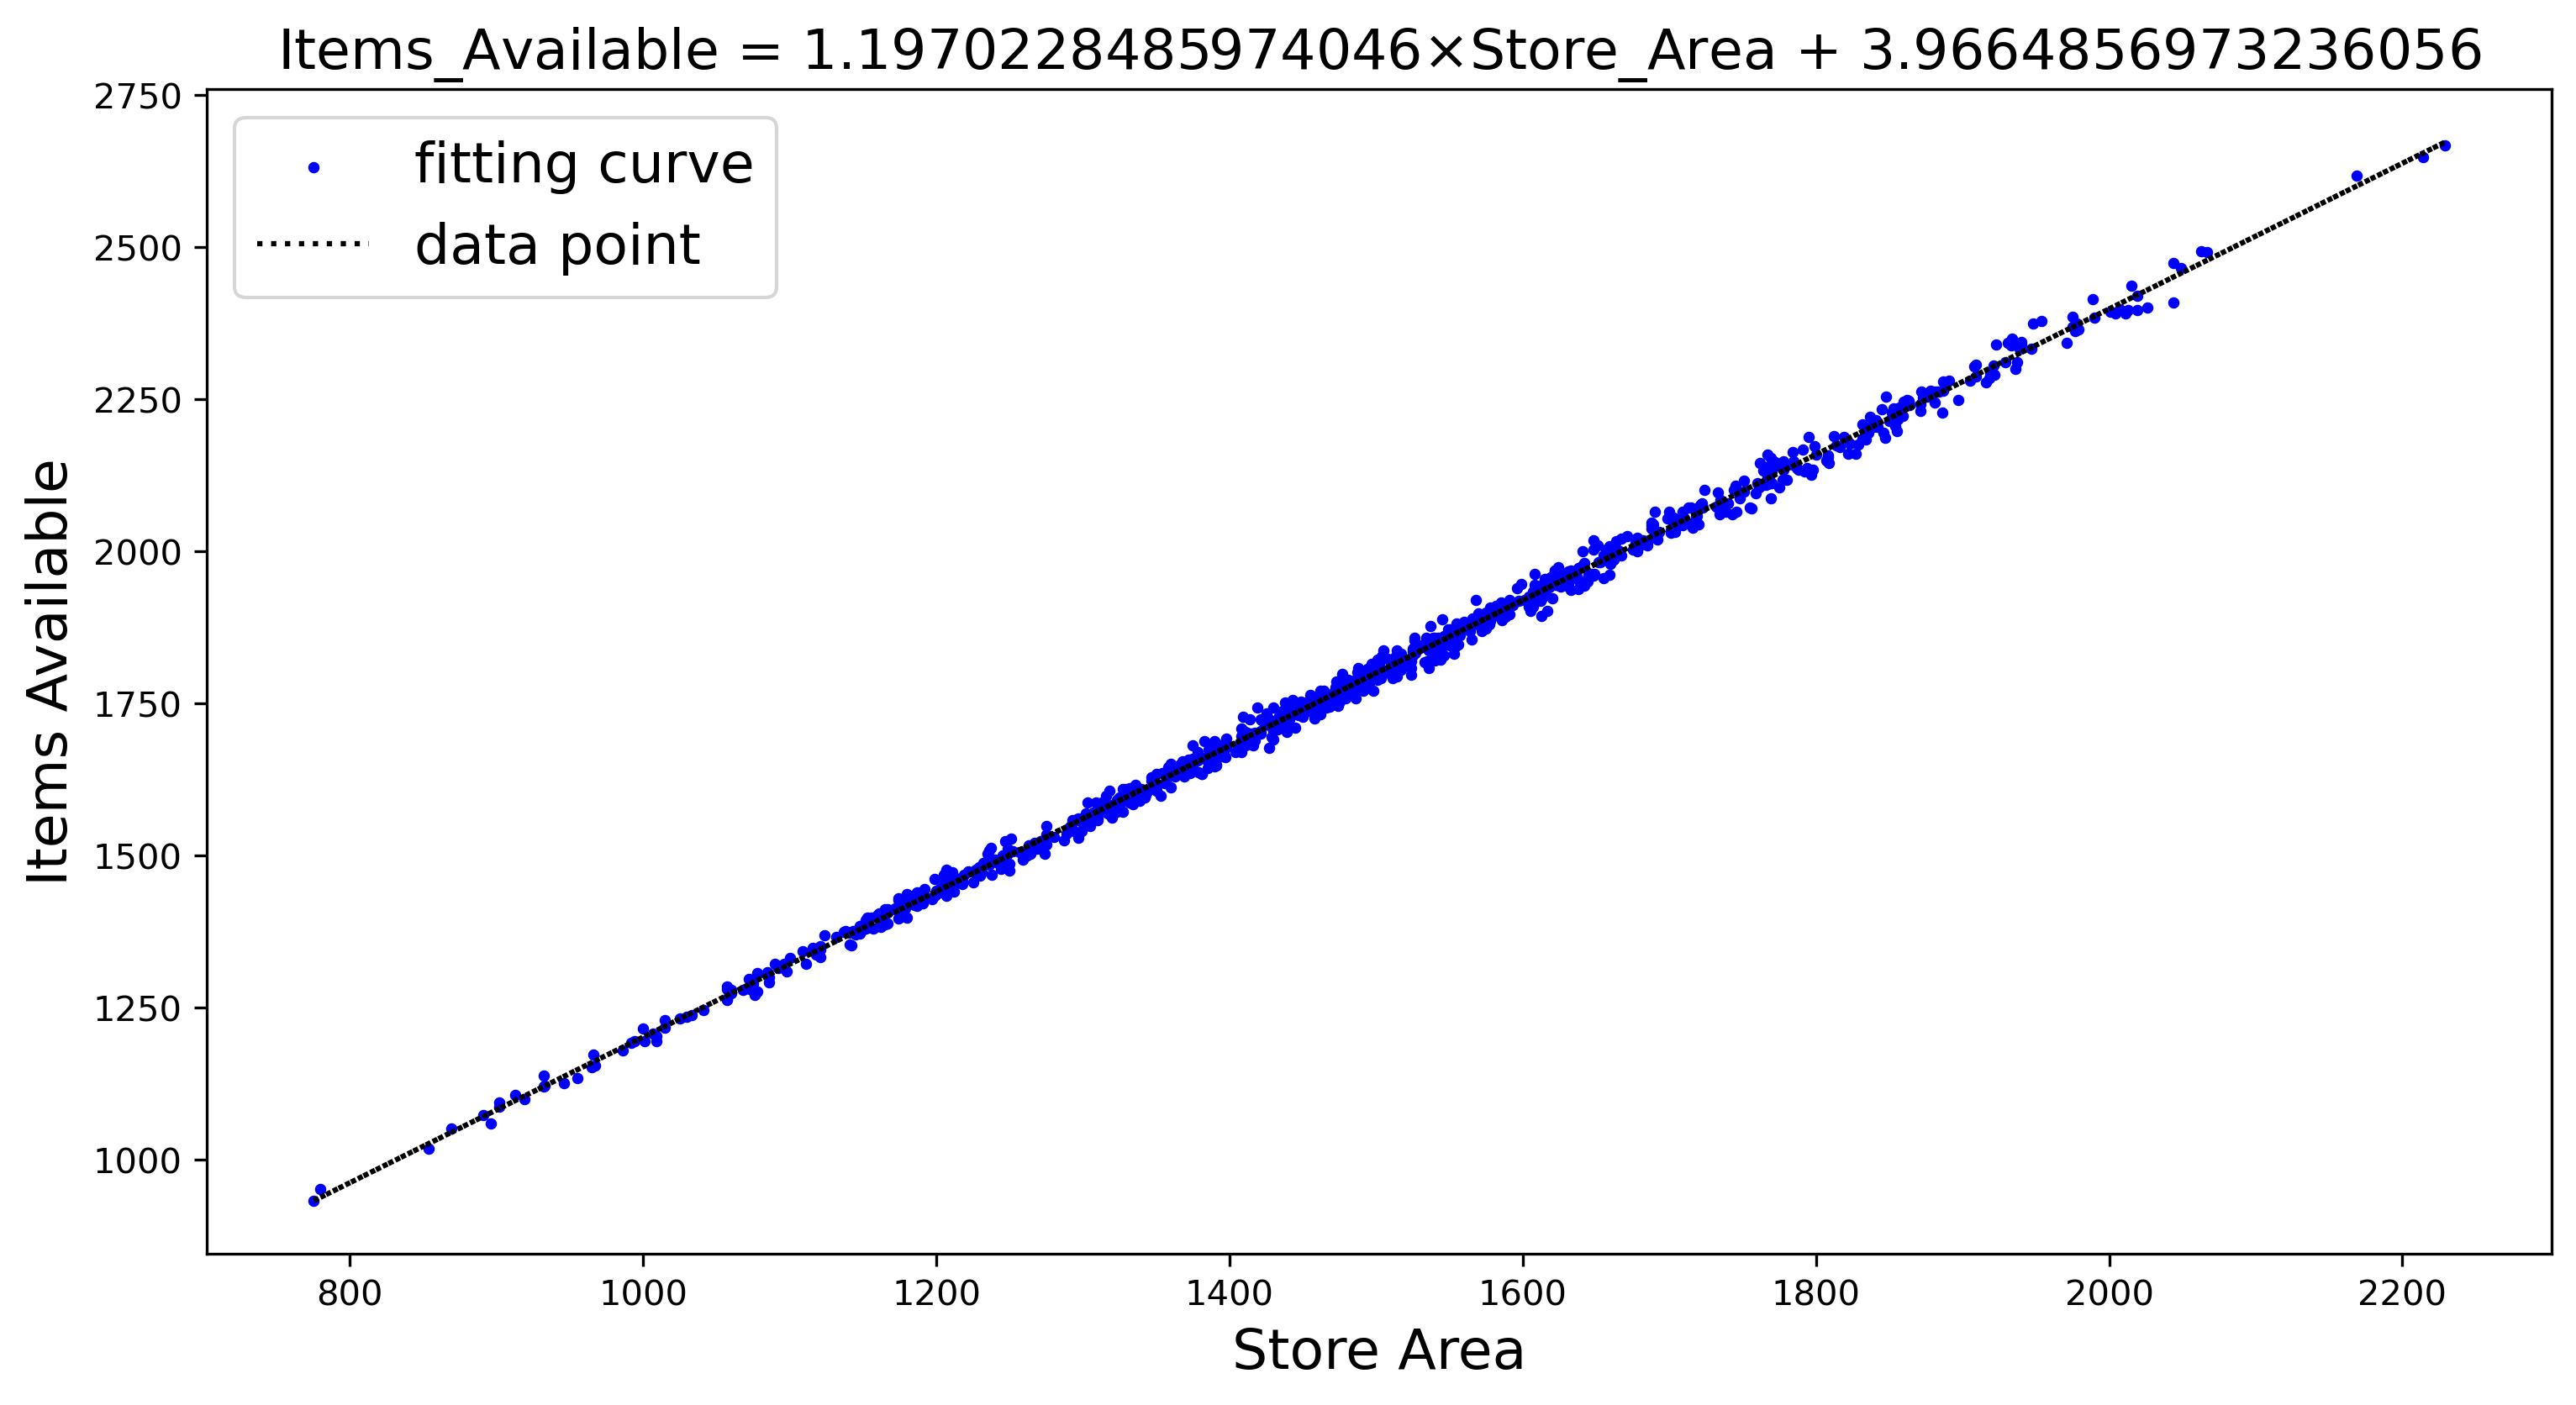

In [11]:
# plot fitting results
plt.figure(figsize=[12,6], dpi=300)
plt.scatter(x, y, c='b', s=5)
plt.plot(x, y_pred, 'k:')
plt.title('Items_Available = '+str(model.coef_[0])+r'$\times$Store_Area + '+str(model.intercept_), fontsize=16)
plt.legend(['fitting curve','data point'], fontsize=16)
plt.xlabel('Store Area', fontsize=16)
plt.ylabel('Items Available', fontsize=16)
plt.show()

# Multiple Linear Regression by scikit-learn

In [12]:
# prepare data for regression analysis
x = np.array(df[['Store_Area','Items_Available','Daily_Customer_Count']])
x = stats.zscore(x)
y = np.array(df['Store_Sales'])
# one-step model fitting
model = LinearRegression().fit(x, y)
# get r squared, intercept, coefficients
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
# intercept and coefficient
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
# prediction
y_pred = model.predict(x)

coefficient of determination: 0.0106480710451613
intercept: 59351.30580357142
coefficients: [-9762.69182731 11458.95456449   213.41655149]


# Polynomial Regression by scikit-learn

In [13]:
# load data
df_1 = pd.read_csv('Position_Salaries.csv')
df_1.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [14]:
# separating independent and dependent variable
x = np.array(df_1['Level']).reshape((-1, 1))
y = np.array(df_1['Salary'])
# polynomial fitting
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)
# get r squared, intercept, coefficients
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_
# prediction
y_pred = model.predict(x_)
# r squared
print(f"coefficient of determination: {r_sq}")
# intercept and coefficient
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.9162082221443943
intercept: 232166.666666666
coefficients: [-132871.21212121   19431.81818182]


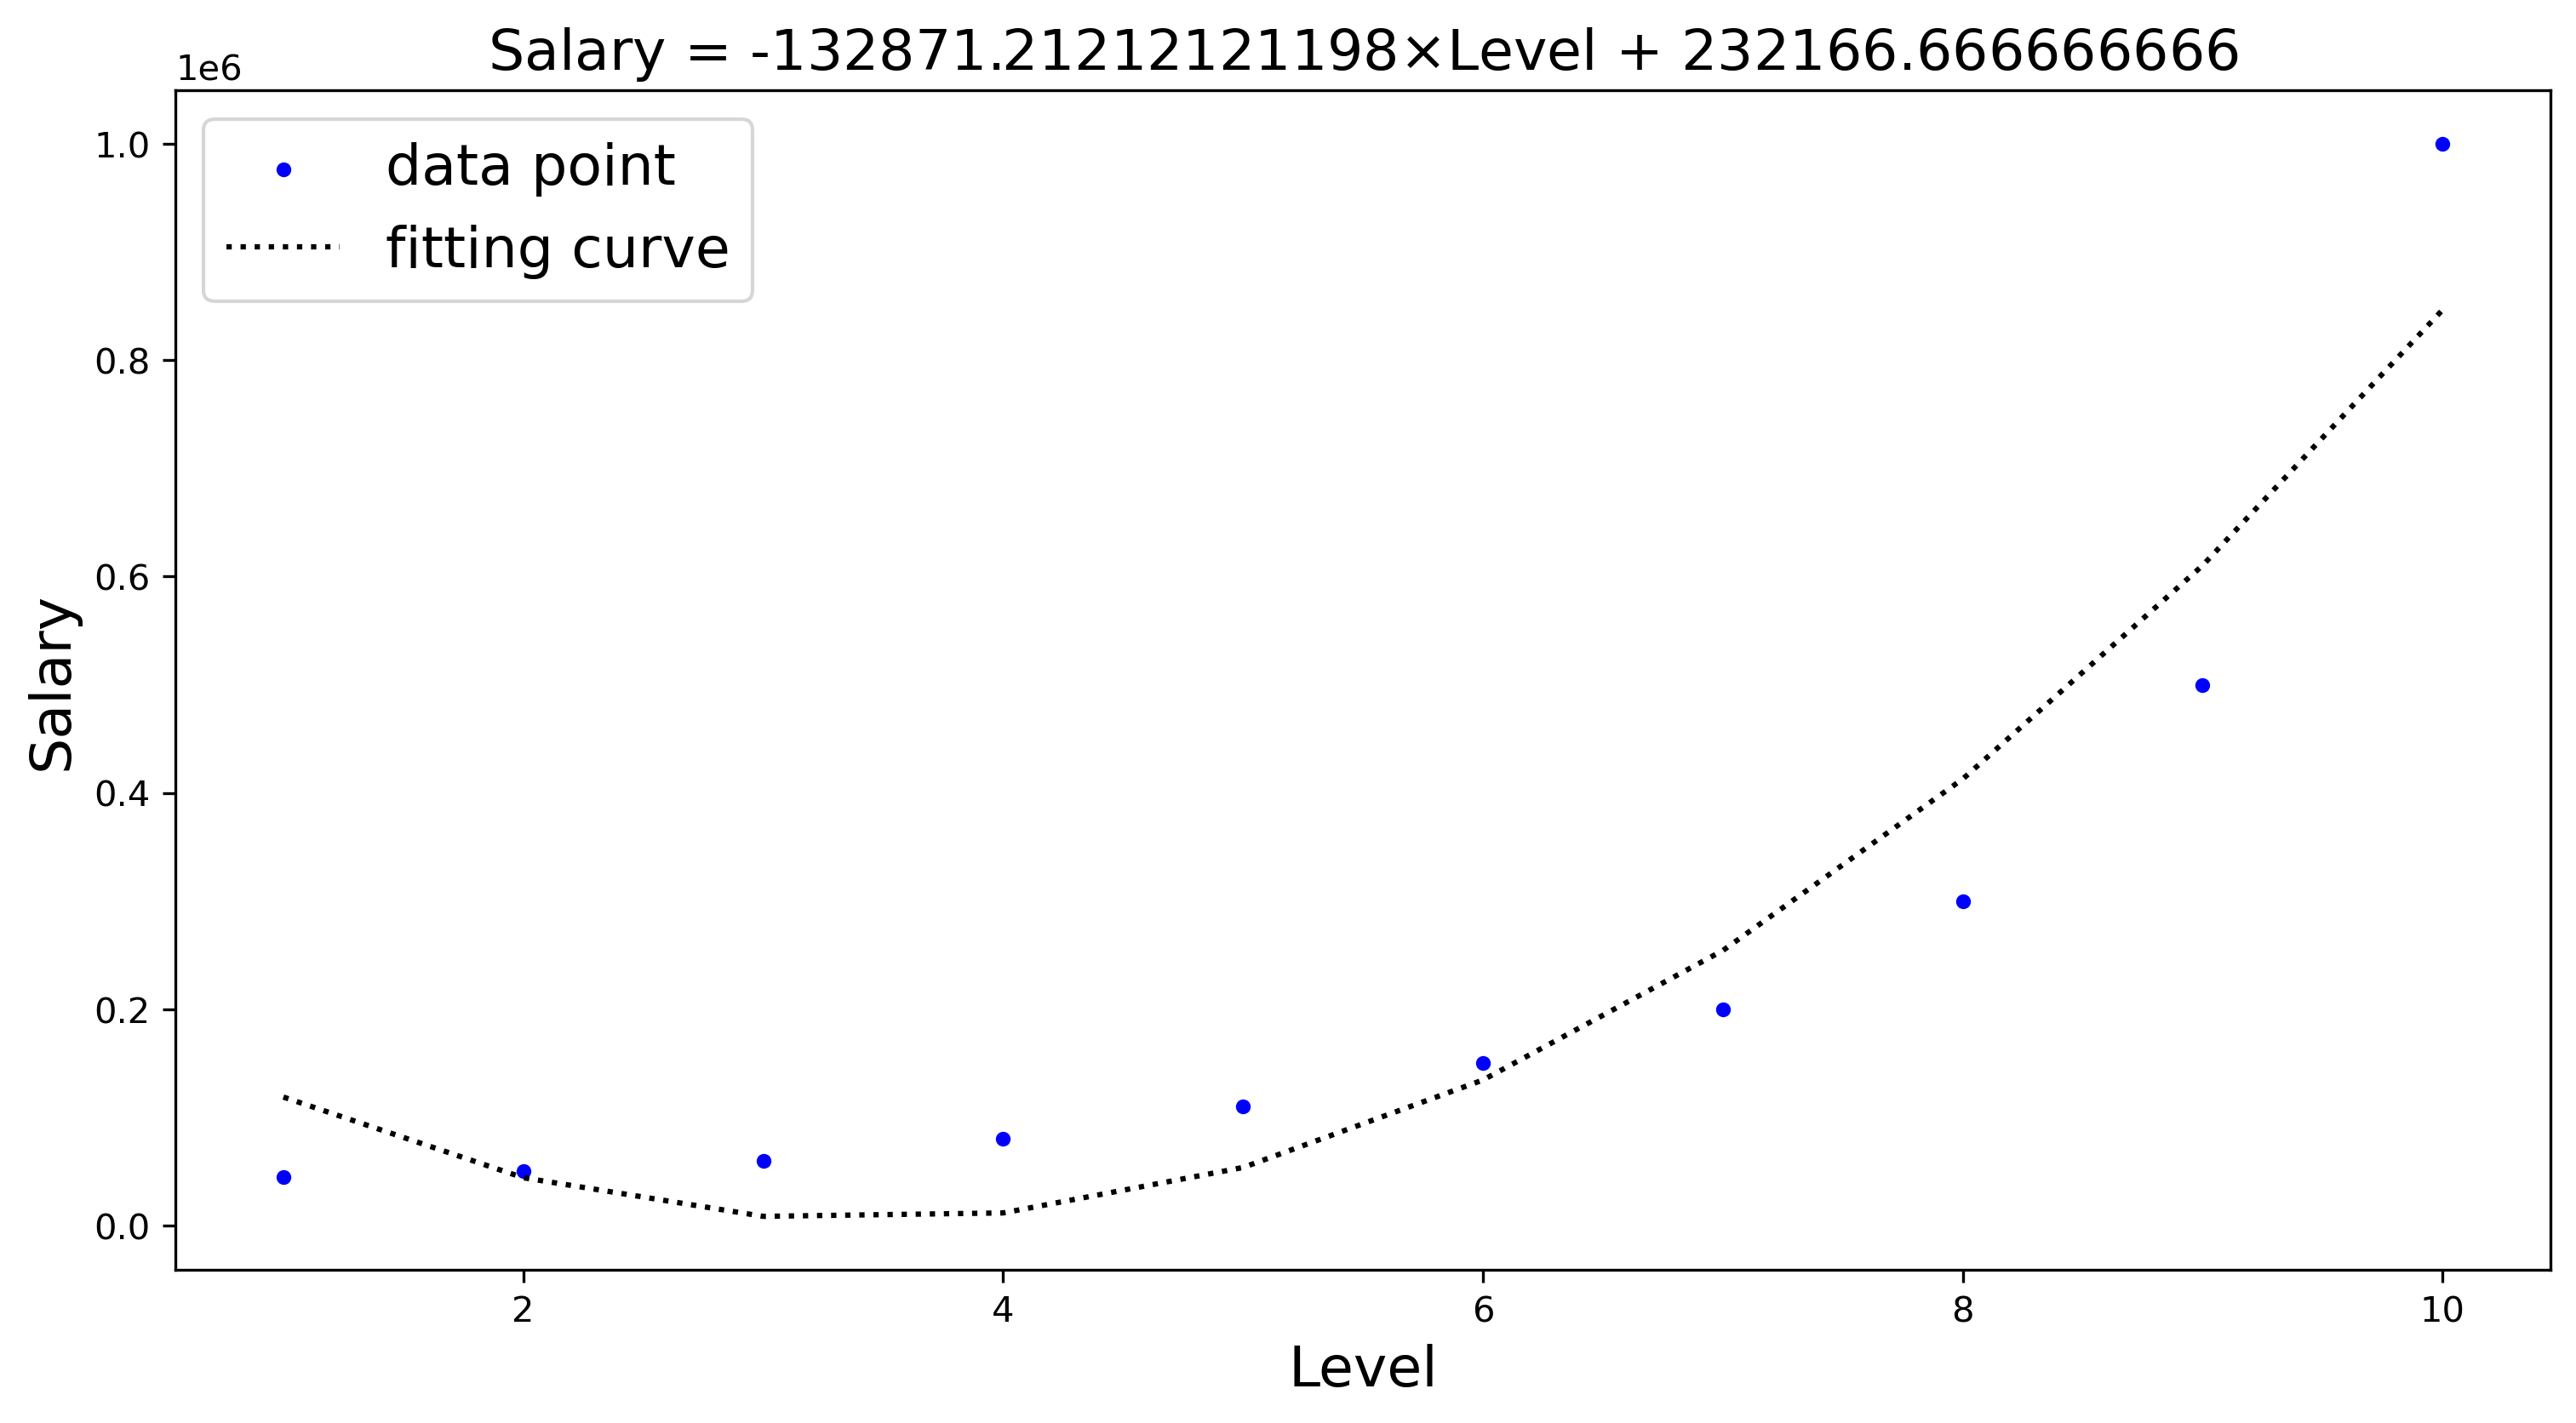

In [15]:
# plot fitting results
plt.figure(figsize=[12,6], dpi=300)
plt.scatter(x, y, c='b', s=10)
plt.plot(x, y_pred, 'k:')
plt.title('Salary = '+str(model.coef_[0])+r'$\times$Level + '+str(model.intercept_), fontsize=16)
plt.legend(['data point','fitting curve'], fontsize=16)
plt.xlabel('Level', fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.show()

# Advanced Linear Regression by statsmodels
reference code: https://www.kaggle.com/code/divan0/multiple-linear-regression/notebook

In [16]:
# load data
df2 = pd.read_csv('kc_house_data.csv')
df2 = df2.drop(['id','date'], axis = 1)
df2.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [17]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

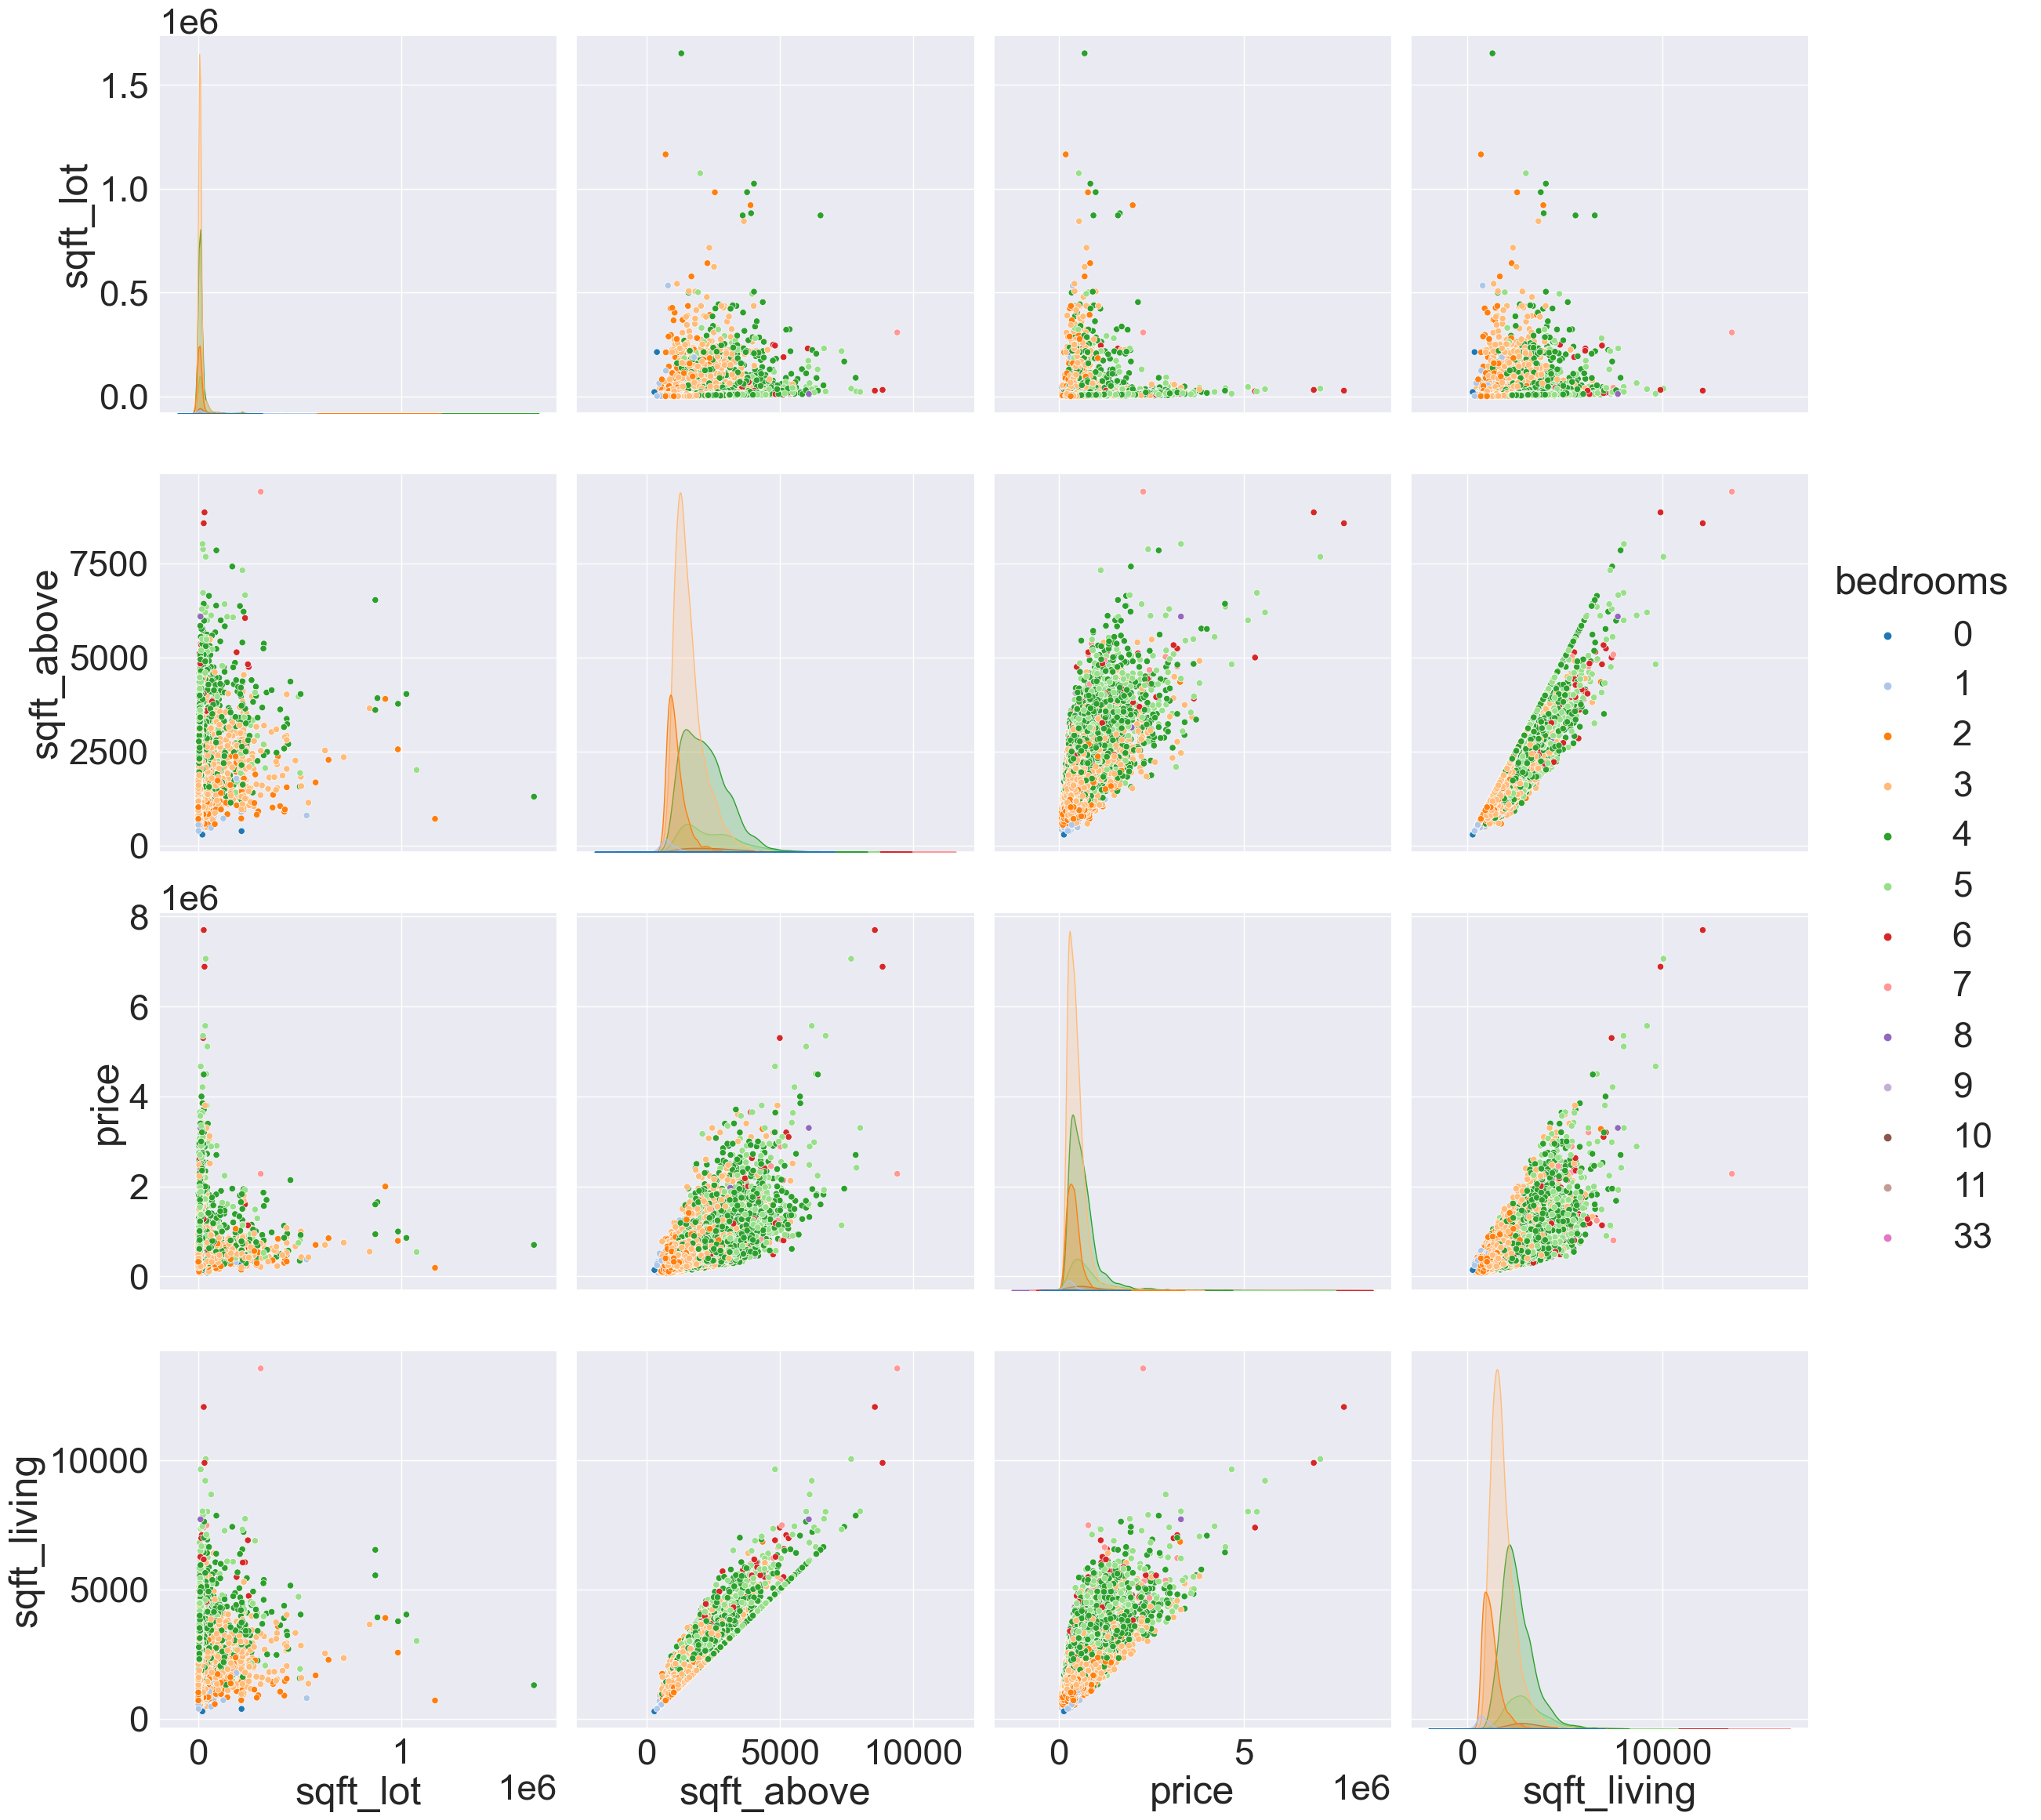

In [18]:
sns.set(font_scale=3)
sns.pairplot(df2[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], palette='tab20', diag_kind='kde', 
             hue='bedrooms', height=6)
plt.show()

In [19]:
# separating independent and dependent variable
X = df2.iloc[:,1:].values
X = stats.zscore(X)
y = df2.iloc[:,0].values
# splitting dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [21]:
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((21613,19)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17]]
X_Modeled = backwardElimination(X_opt, SL)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.222
Model:                            OLS   Adj. R-squared (uncentered):              0.221
Method:                 Least Squares   F-statistic:                              361.5
Date:                Mon, 01 Jan 2024   Prob (F-statistic):                        0.00
Time:                        17:51:52   Log-Likelihood:                     -3.1735e+05
No. Observations:               21613   AIC:                                  6.347e+05
Df Residuals:                   21596   BIC:                                  6.349e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Evaluation Metrics
### R Squared ($R^2$):
R squared, also called the coefficient of determination, describes the percentage of explanation of dependent variables by parameters (independent variables). In general, the model fitting results could be divided into two parts: residual sum of squares and regression sum of squares.<br\>
<b>(1) Residual Sum of Squares:</b><br\>
$$
SSR = SS_{res} = \sum_{i=1}^{n}{(y_i-\hat{y_i})^2}
$$
where $y_i$ is the ground truth values (dependent variable) and $\hat{y_i}$ is the predicted values.<br/>
<b>(2) Total Sum of Squares:</b><br\>
$$
SST = SS_{total} = \sum_{i=1}^{n}{(y_i-\bar{y_i})^2}
$$
where $y_i$ is the ground truth values (dependent variable) and $\bar{y_i}$ is the average value of observation.<br/>
Hence, the <b>R squared</b> could be calculated by<br/>
$$
R^2 = 1-\frac{SSR}{SST} = 1-\frac{SS_{res}}{SS_{total}} = 1-\frac{\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}}{\sum_{i=1}^{n}{(y_i-\bar{y_i})^2}}
$$

### Adjusted R Squared ($Adj. R^2$):
You may expect a higher R squared while you run a regression analysis; however, a higher R squared does not guarantee an excellent fitting result. It is because the high R squared is a fake phenomenon - that is overfitting. You can undoubtedly utilize all parameters in the regression model, but some of them are useless and redundant. Here, adjusted R squared is one of the most common evaluation metrics to measure the necessity of your parameters, referring to the number of parameters adopted.<br/>
$$
Adj. R^2 = 1-\frac{Var_{res}}{Var_{tot}} = 1-\frac{\frac{SSR}{df_e}}{\frac{SST}{df_t}} = 1-\frac{\frac{SSR}{n-p-1}}{\frac{SST}{n-1}}
$$
where $n$ is the number of observations and $p$ is the number of parameters.<br/>
Notice: Adjusted R Squared is equal to or less than R Squared.<br/>

### F-statistic
The hypotheses for the F-test in the regression analysis are as follows:<br/>
<b>Null hypothesis</b>: The fit of the intercept-only model and your model are equal.<br/>
<b>Alternative hypothesis</b>: The fit of the intercept-only model is significantly reduced compared to your model.<br/>

### Log-likelihood
<b>Log Likelihood</b> value is a measure of goodness of fit for any type of model. A higher Log Likelihood value indicates a better model fitting. The general formula is given by<br/>
$$
L(Y|X,\beta,σ2)=N(Y|f(X,\beta),σ^2)
$$
where $X$ is the observations, $\beta$ is the coefficients of parameters, and $\sigma^2$ is the noise variance.<br/>
Different from $R^2$, the value of Log Likelihood lies between $-\infty$ to $+\infty$; therefore, we cannot directly use the absolute value to imply whether this model is well fitted or not. But, we may compare the Log Likelihood values between multiple models for model selection.<br/>

### AIC
<b>AIC</b> stands for "<i>Akaike information criterion</i>", which is an estimator of prediction error and the goodness of fit of statistical models for a given dataset. The formula of AIC is given by<br/> 
$$
\mathrm{AIC} \,=\,2k-2\ln({\hat {L}})
$$
where $k$ is the number of estimated parameters of the model, $\hat{L}$ is the maximized value of the likelihood function for the model.<br/>
Different from $R^2$, AIC not only evaluates the goodness of fit, but also considers the complexity of the model with a penalty of overfitting, referring the number of parameters. As a result, a lower AIC indicates a better goodness of fit for model selection.<br/>
AIC is developed on the basis of information theory. AIC estimates the relative amount of information lost by a given model - the less information loss, the higher the quality of that model. Hence, AIC could both estimate the risks of overfitting and underfitting with a consideration of goodness of fit and the simplicity of the model.

### BIC
<b>BIC</b> stands for "Bayesian information criterion", which is a criterion for model selection among a finite set of models, where models with lower BIC are generally preferred. Although both AIC and BIC could measure the fitting quality of a given model, the penalty term in BIC is much larger than in AIC for sample sizes greater than 7. The formula of BIC is given by<br/>
$$
\mathrm{BIC}=k\ln(n)-2\ln({\widehat {L}})
$$
where $k$ is the number of estimated parameters of the model, $n$ is the number of observations, $\hat{L}$ is the maximized value of the likelihood function for the model.

### Durbin–Watson statistic
<b>Durbin–Watson statistic</b> is used to detect the presence of autocorrelation at lag 1 in the residuals (prediction errors) from a regression analysis.
Let $e_t$ is the residual at timestamp $t$, then Durbin–Watson statistic could be calculated by<br/>
$$
d={\sum _{t=2}^{T}(e_{t}-e_{t-1})^{2} \over {\sum _{t=1}^{T}e_{t}^{2}}}
$$
where $T$ is the number of observations. For a large $T$, $d$ could be approximated to $2(1-\hat{\tho})$, referring to the sample autocorrelation of the residuals. Therefore, there is no autocorrelation when $d=2$. The value of $d$ always lies between 0 and 4. If $d$ is substantially less than 2, there is evidence of positive serial correlation. If $d$ > 2, successive error terms are negatively correlated.<br/>
<br/>
To test for positive autocorrelation at significance $\alpha$, the test statistic $d$ is compared to lower and upper critical values ($dL,α$ and $dU,α$):<br/>
If $d < dL,α$, there is statistical evidence that the error terms are positively autocorrelated.<br/>
If $d > dU,α$, there is no statistical evidence that the error terms are positively autocorrelated.<br/>
If $dL,α < d < dU,α$, the test is inconclusive.<br/>
Positive serial correlation is serial correlation in which a positive error for one observation increases the chances of a positive error for another observation.<br/>
<br/>
To test for negative autocorrelation at significance $α$, the test statistic $(4 − d)$ is compared to lower and upper critical values ($dL,α$ and $dU,α$):<br/>
If $(4 − d) < dL,α$, there is statistical evidence that the error terms are negatively autocorrelated.<br/>
If $(4 − d) > dU,α$, there is no statistical evidence that the error terms are negatively autocorrelated.<br/>
If $dL,α < (4 − d) < dU,α$, the test is inconclusive.<br/>
Negative serial correlation implies that a positive error for one observation increases the chance of a negative error for another observation and a negative error for one observation increases the chances of a positive error for another.<br/>

### Jarque–Bera test
<b>Jarque–Bera test</b> is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution. The formula of Jarque–Bera test is defined by<br/>
$$
JB = \frac{n}{6}(S^2+\frac{1}{4}(K-3)^2)
$$
where $n$ is the number of observations, $S$ is the sample skewness, and $K$ is the sample kurtosis.
$$
S = \frac{\hat{\mu_3}}{\hat{\sigma_3}}=\frac{\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^3}}{(\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2})^{3/2}}\\
K = \frac{\hat{\mu_4}}{\hat{\sigma_4}}=\frac{\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^4}}{(\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2})^{2}}
$$
where $\hat{\mu }_{3}$ and $\hat{\mu }_{4}$ are the estimates of third and fourth central moments, respectively, $\bar{x}$ is the sample mean, and $\hat{\sigma }^{2}$ is the estimate of the second central moment, the variance.<br/>
The regression version of Jarque-Bera test is defined by<br/>
$$
JB = \frac{n-k}{6}(S^{2}+\frac{1}{4}(K-3)^{2})
$$
where $k$ is the number of parameters.

<b>Further Reading:</b><br/>
1. https://www.data-automaton.com/2021/02/10/maximum-likelihood-for-linear-regression/
2. https://www.data-automaton.com/2017/12/25/linear-regression/

# Time-series Data

In [22]:
# load data
df3 = pd.read_csv('nyc-east-river-bicycle-counts.csv')
del df3['Unnamed: 0']
df3['Day'] = pd.to_datetime(df3['Day'])
df3 = df3.iloc[:30,:]
df3.head()

Date        Day  High Temp (°F)  Low Temp (°F)  \
0  2016-04-01 00:00:00 2016-04-01            78.1           66.0   
1  2016-04-02 00:00:00 2016-04-02            55.0           48.9   
2  2016-04-03 00:00:00 2016-04-03            39.9           34.0   
3  2016-04-04 00:00:00 2016-04-04            44.1           33.1   
4  2016-04-05 00:00:00 2016-04-05            42.1           26.1   

  Precipitation  Brooklyn Bridge  Manhattan Bridge  Williamsburg Bridge  \
0          0.01           1704.0              3126               4115.0   
1          0.15            827.0              1646               2565.0   
2          0.09            526.0              1232               1695.0   
3      0.47 (S)            521.0              1067               1440.0   
4             0           1416.0              2617               3081.0   

   Queensboro Bridge  Total  
0             2552.0  11497  
1             1884.0   6922  
2             1306.0   4759  
3             1307.0   4335  
4             2357.0   9471

In [23]:
# string to number
num = df3['Precipitation'].str.split(' |T', expand=True)[[0]].values
num[num == ''] = 0
df3['Precipitation'] = np.float16(num)

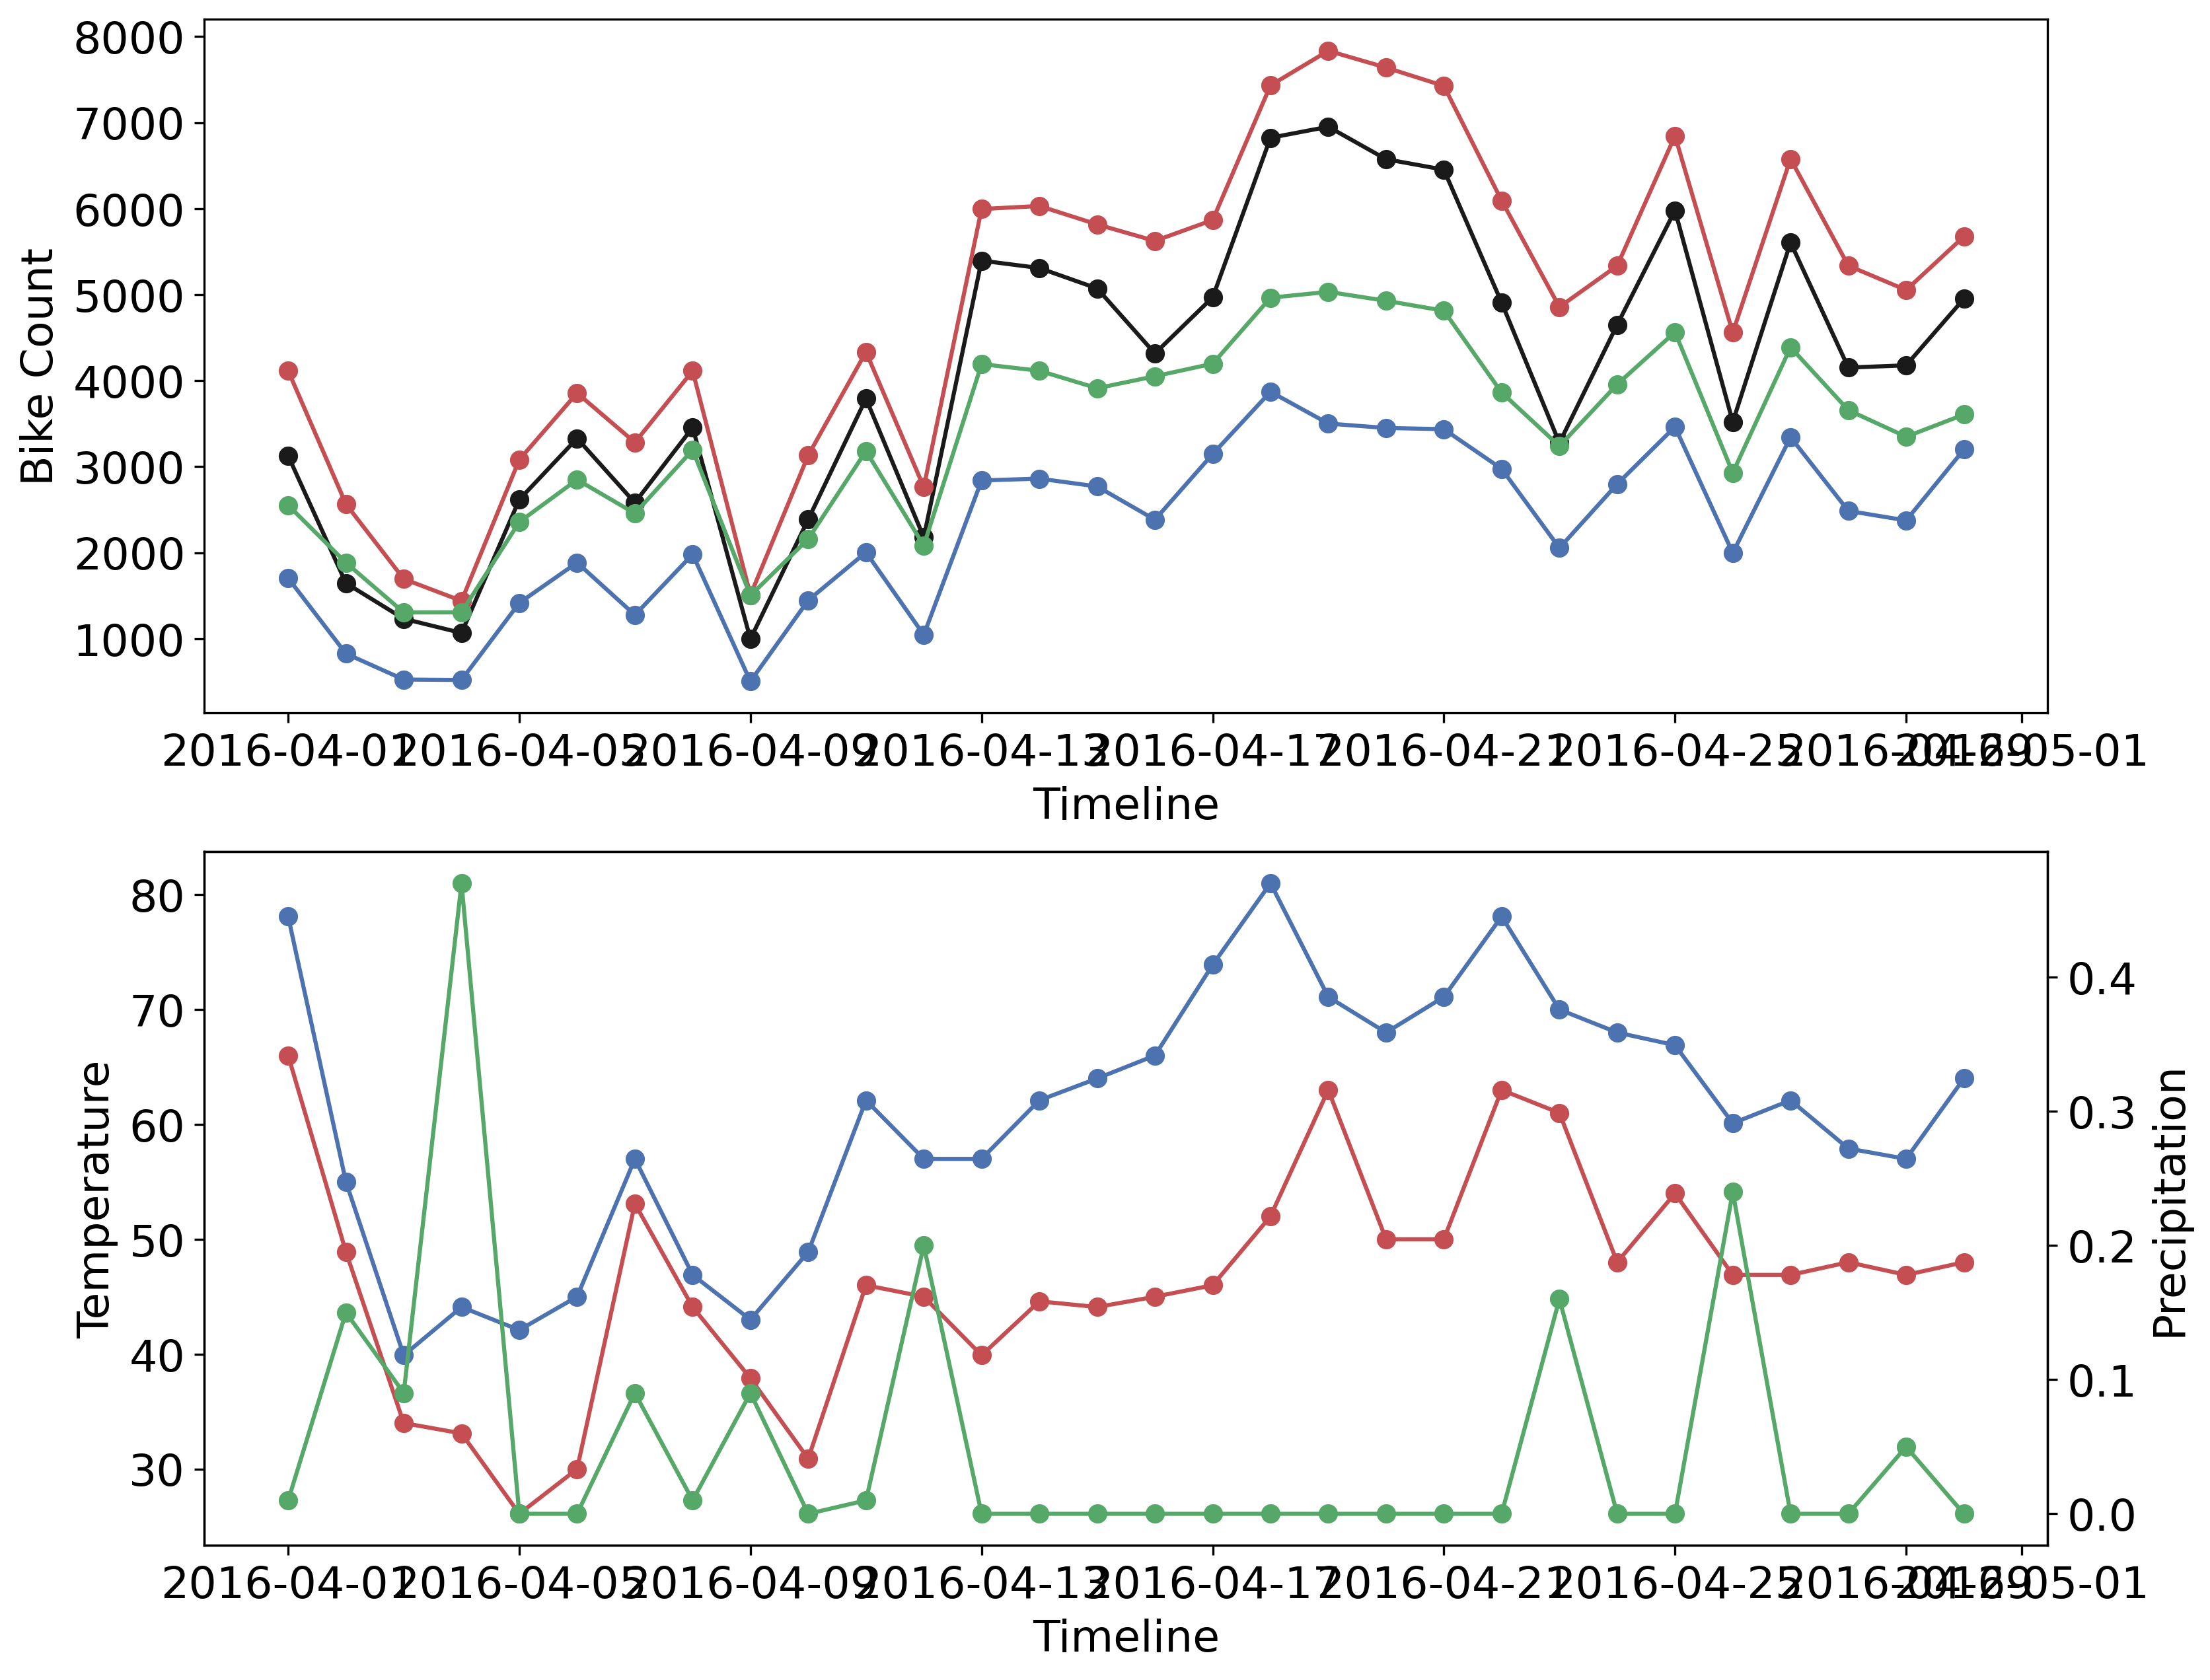

In [24]:
# plot trend
plt.style.use('default')
plt.subplots(figsize=[12,10], dpi=300)
plt.subplot(211)
plt.plot(df3['Day'], df3['Brooklyn Bridge'], 'b-o')
plt.plot(df3['Day'], df3['Manhattan Bridge'], 'k-o')
plt.plot(df3['Day'], df3['Williamsburg Bridge'], 'r-o')
plt.plot(df3['Day'], df3['Queensboro Bridge'], 'g-o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Timeline', fontsize=16)
plt.ylabel('Bike Count', fontsize=16)
ax = plt.subplot(212)
ax.plot(df3['Day'], df3['High Temp (°F)'], 'b-o')
ax.plot(df3['Day'], df3['Low Temp (°F)'], 'r-o')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Timeline', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
# share x axis
ax2=ax.twinx()
ax2.plot(df3['Day'], df3['Precipitation'], 'g-o')
ax2.tick_params(axis='both', which='major', labelsize=16)
plt.ylabel('Precipitation', fontsize=16)
plt.show()